# DailyBeer

In [1]:
import sqlite3
conn = sqlite3.connect("OrderAll.db")

## 1. Monthly  Total Amount Report

In [2]:
from pandas import Series, DataFrame
import pandas as pd

sql_cmd = """
            select month, sum(total) as grandtotal
            from OrderAll
            group by month
            order by month;
"""
cursor = conn.cursor()
cursor.execute(sql_cmd)
tuples = cursor.fetchall()

SR_Gtotal = Series([])


for tuple in tuples:
    SR_Gtotal = SR_Gtotal.set_value(int(tuple[0]), int(tuple[1]))
    print "{:>10}".format(tuple[0]), '월', "{:>12,}".format(tuple[1]),'원'

print SR_Gtotal.values
print SR_Gtotal.index

         7 월    8,474,601 원
         8 월    7,594,394 원
         9 월    6,673,702 원
        10 월    4,974,996 원
        11 월    4,325,622 원
        12 월    4,400,016 원
[8474601 7594394 6673702 4974996 4325622 4400016]
Int64Index([7, 8, 9, 10, 11, 12], dtype='int64')


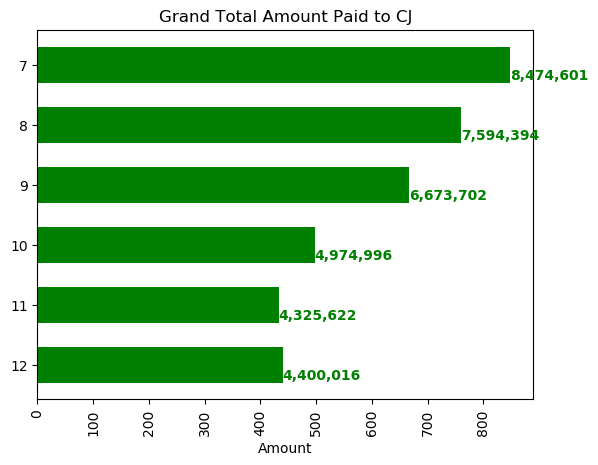

In [3]:
from itertools import cycle, islice
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

ind = np.arange(len(SR_Gtotal))
listtotal = SR_Gtotal.values
listindex = SR_Gtotal.index

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = listindex
y_pos = np.arange(len(listindex))
performance = listtotal
error = np.random.rand(len(listindex))

ax.barh(y_pos, performance, 0.6, align='center',
        color='green', ecolor='black')

for i, v in enumerate(listtotal):
    ax.text(v + 3, i + .25, "{:,}".format(v), color='green', fontweight='bold')

ax.set_yticks(y_pos)
ax.set_yticklabels(listindex)
ax.set_xticklabels([0,100,200,300,400,500,600,700,800,900,1000], rotation=90)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel(u'Amount')
ax.set_title('Grand Total Amount Paid to CJ')

plt.show()

##  2. Make the SQL Result as the DataFrame Directly

In [4]:
sql_cmd = """
select
        sku, pname,
        month,
        sum(total) as gtotal,
        sum(qty) as tqty
from OrderAll
group by sku, month
order by sku, month;
"""
SQL_Result_DF1 = pd.read_sql_query(sql_cmd, conn)

In [5]:
#print SQL_Result_DF1

In [6]:
print len(SQL_Result_DF1.index)

272


In [7]:
pd.options.display.max_rows

60

In [8]:
pd.options.display.max_rows = 999


In [9]:
SQL_Result_DF1.columns

Index([u'sku', u'pname', u'month', u'gtotal', u'tqty'], dtype='object')

In [10]:
SQL_Result_DF1.set_index(['sku','pname', 'month'])

gtotal  tqty
sku    pname                                            month               
100353 백설 바삭튀김가루(1Kg/EA) 미국-※미국산                        8         2750     1
                                                        9        13750     5
                                                        12       11000     4
100743 코카콜라 콜라(캔_355ml 355g/EA) 한국 24EA/BOX-※국내산        7        68112     4
                                                        8        68112     4
                                                        9        34056     2
                                                        10       34056     2
                                                        11       34980     2
                                                        12       35904     2
100744 스프라이트 사이다(355ml 355g/EA) 한국 24EA/BOX-※국내산        7        76955     5
                                                        8        76955     5
                                                        9        61564     4
                                                        10       46173     3
                                                        11       30782     2
                                                        12       61564     4
105409 아담스 파마산치즈파우더(1Kg/EA)                             7        24200     2
                                                        8        12100     1
111308 천일식품 새우볶음밥(300g/EA)                              7        23309    13
                                                        8        17930    10
                                                        10       17930    10
112371 칵테일냅킨(생활맥주용 10000장입 BOX) 1EA/BOX                 7        33000     1
                                                        8        33000     1
                                                        10       33000     1
                                                        12       33000     1
115364 삼진 살사소스(2Kg/EA)                                  7        39600     4
                                                        8        59400     6
                                                        9        19800     2
                                                        10       59400     6
                                                        12       39600     4
115722 사세통상 버팔로윙(1Kg/EA) 태국-※닭고기(태국산)                   7       242550    21
                                                        8       127050    11
                                                        9       173250    15
                                                        10      127050    11
                                                        11      184800    16
                                                        12       23100     2
116709 리코스 나쵸칩(454g/EA) 미국-※미국                          7       267960    84
                                                        8       210540    66
                                                        9       191400    60
                                                        10      111650    35
                                                        11      127600    40
                                                        12       79750    25
116981 사세통상 버팔로윙스틱(1Kg/EA) 태국-※닭고기(태국산)                 7       226380    21
                                                        8       172480    16
                                                        9       161700    15
                                                        10      118580    11
                                                        11      194040    18
                                                        12       43120     4
118232 스팸 햄캔(마일드 200g/EA)-※돼지고기(수입산 80%+국내산 20%) 96.27% 7       138600    45
                                                        8       184800    60
                                                        9       169400    55
                                                        10  

## DataFrame to Excel

In [22]:
writer = pd.ExcelWriter('CJ_Result.xlsx')

In [23]:
SQL_Result_DF1.to_excel(writer, '2017All')


### Pandas sort by group aggregate and column

https://stackoverflow.com/questions/14941366/pandas-sort-by-group-aggregate-and-column

In [24]:
df_grouped = SQL_Result_DF1.groupby(['sku', 'pname'])
sort_group = SQL_Result_DF1.ix[df_grouped['gtotal'].transform(sum).sort_values(ascending=False).index]

sort_group.set_index(['sku', 'pname', 'month'])
#print len(sort_group.set_index(['sku', 'pname', 'month']).index)

gtotal  tqty
sku    pname                                            month               
424782 염지닭(생활맥주용 9호_9각 850g/EA) 10EA/BOX                9      1254330    21
                                                        7      1672440    28
                                                        12      836220    14
                                                        11      657030    11
                                                        10     1015410    17
                                                        8      1552980    26
424783 염지닭안심(생활맥주용 1Kg/EA) 5EA/BOX                      12      364320     8
                                                        11      318780     7
                                                        10      318780     7
                                                        9       455400    10
                                                        7       683100    15
                                                        8       364320     8
134356 심플로트 냉동감자(메가크런치 2.04Kg/EA)                       11      295812    27
                                                        7       602580    55
                                                        8       493020    45
                                                        9       438240    40
                                                        10      449196    41
140440 심플로트 냉동감자(크링클컷웨지 2.26Kg/EA)                      7       476036    62
                                                        8       383900    50
                                                        9       399256    52
                                                        10      291764    38
                                                        11      253374    33
                                                        12      284086    37
232931 반건오징어(생활맥주용 10미 1.3Kg/EA) 한국-※국내산                7       354000    12
                                                        12      310000    10
                                                        11      270500     9
                                                        8       590000    20
                                                        10      177000     6
                                                        9       383500    13
176689 소시지(생활맥주용 천연돈장_70g*4입 280g/EA) 한국-※돼지고기(국내산)     10      216315    45
                                                        12      264385    55
                                                        11      264385    55
                                                        9       394174    82
                                                        8       490314   102
                                                        7       312455    65
144398 심플로트 냉동감자(세이보리_스트레이트컷 2.26Kg/EA)                 8       340494    33
                                                        11      154770    15
                                                        10      257950    25
                                                        9       443674    43
                                                        7       557172    54
169394 샐러드믹스(생활맥주용 150g*5입 750g/BOX) 한국 1EA/BOX-※국내산    12      201600    14
                                                        8       288000    20
                                                        9       187200    13
                                                        11      158400    11
                                                        7       345600    24
                                                        10      144000    10
201934 소고기육포(생활맥주용 70g/EA) 호주-※호주산                      12      196515    45
                                                        9       152845    35
                                                        10      174680    40
                                                        11      174680    40
                                                        7   

In [25]:
sort_group.set_index(['sku', 'pname', 'month']).to_excel(writer, '2017ALLGroup')
writer.save()

# 99. Test Section

In [14]:
# SQL_Result_DF_index3 = SQL_Result_DF1.set_index(['sku','pname', 'month'])

### GROUP BY 'SKU"

df_grouped = SQL_Result_DF1.groupby(['sku', 'pname'])

###

print 'Total Number of Groups', df_grouped.ngroups

"""
for k, g in df_grouped:
    print k[0], k[1],'\t\t', 
    gsum = g['gtotal'].sum()
    print 'Group Total', "{:>12,}".format(gsum), '원'
    print '-'*100
"""
    
df_grouped_sum =  SQL_Result_DF1.groupby([u'sku', u'pname']).sum()
print df_grouped_sum[df_grouped_sum['gtotal']>6000000]
print "2,000,000 ~ 6,000,000"
print df_grouped_sum[(df_grouped_sum['gtotal'] > 2000000) & (df_grouped_sum['gtotal'] <= 6000000) ]
print "1,000,000 ~ 2,000,000"
print df_grouped_sum[(df_grouped_sum['gtotal'] > 1000000) & (df_grouped_sum['gtotal'] <= 2000000) ]
#print ""
#print df_grouped_sum[(df_grouped_sum['gtotal'] > 600000) & (df_grouped_sum['gtotal'] <= 1000000) ]
print "400,000 ~ 1,000,000"
print df_grouped_sum[(df_grouped_sum['gtotal'] > 400000) & (df_grouped_sum['gtotal'] <= 1000000) ]
print "200,000 ~ 400,000"
print df_grouped_sum[(df_grouped_sum['gtotal'] > 200000) & (df_grouped_sum['gtotal'] <= 400000) ]
print "100,000 ~ 200,000"
print df_grouped_sum[(df_grouped_sum['gtotal'] > 100000) & (df_grouped_sum['gtotal'] <= 200000) ]
print "50,000 ~ 100,000"
print df_grouped_sum[(df_grouped_sum['gtotal'] > 50000) & (df_grouped_sum['gtotal'] <= 100000) ]
print "000,000 ~ 50,000"
print df_grouped_sum[(df_grouped_sum['gtotal'] > 0) & (df_grouped_sum['gtotal'] <= 50000) ]



# print df_grouped_sum[['gtotal','tqty']].sort_values('gtotal', ascending=False)




Total Number of Groups 70
                                          month   gtotal  tqty
sku    pname                                                  
424782 염지닭(생활맥주용 9호_9각 850g/EA) 10EA/BOX     57  6988410   117
2,000,000 ~ 6,000,000
                                          month   gtotal  tqty
sku    pname                                                  
134356 심플로트 냉동감자(메가크런치 2.04Kg/EA)            45  2278848   208
140440 심플로트 냉동감자(크링클컷웨지 2.26Kg/EA)           57  2088416   272
232931 반건오징어(생활맥주용 10미 1.3Kg/EA) 한국-※국내산     57  2085000    70
424783 염지닭안심(생활맥주용 1Kg/EA) 5EA/BOX           57  2504700    55
1,000,000 ~ 2,000,000
                                                      month   gtotal  tqty
sku    pname                                                              
144398 심플로트 냉동감자(세이보리_스트레이트컷 2.26Kg/EA)                  45  1754060   170
163815 이츠웰 골뱅이캔(자연산 140g/EA)                             57  1238160   402
169394 샐러드믹스(생활맥주용 150g*5입 750g/BOX) 한국 1EA/BOX-※국내산     57  13

In [15]:
SQL_Result_DF1.set_index(['sku', 'pname', 'month'])[:15].unstack(level=-1)

gtotal                    \
month                                                  7        8        9    
sku    pname                                                                  
100353 백설 바삭튀김가루(1Kg/EA) 미국-※미국산                      NaN   2750.0  13750.0   
100743 코카콜라 콜라(캔_355ml 355g/EA) 한국 24EA/BOX-※국내산  68112.0  68112.0  34056.0   
100744 스프라이트 사이다(355ml 355g/EA) 한국 24EA/BOX-※국내산  76955.0  76955.0  61564.0   

                                                                             \
month                                                  10       11       12   
sku    pname                                                                  
100353 백설 바삭튀김가루(1Kg/EA) 미국-※미국산                      NaN      NaN  11000.0   
100743 코카콜라 콜라(캔_355ml 355g/EA) 한국 24EA/BOX-※국내산  34056.0  34980.0  35904.0   
100744 스프라이트 사이다(355ml 355g/EA) 한국 24EA/BOX-※국내산  46173.0  30782.0  61564.0   

                                                 tqty                           
month                                              7    8    9    10   11   12  
sku    pname                                                                    
100353 백설 바삭튀김가루(1Kg/EA) 미국-※미국산                  NaN  1.0  5.0  NaN  NaN  4.0  
100743 코카콜라 콜라(캔_355ml 355g/EA) 한국 24EA/BOX-※국내산  4.0  4.0  2.0  2.0  2.0  2.0  
100744 스프라이트 사이다(355ml 355g/EA) 한국 24EA/BOX-※국내산  5.0  5.0  4.0  3.0  2.0  4.0

## Font in Plot 

In [16]:
matplotlib.matplotlib_fname()

u'/Users/kylelee/anaconda2/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc'

In [17]:
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()

[]

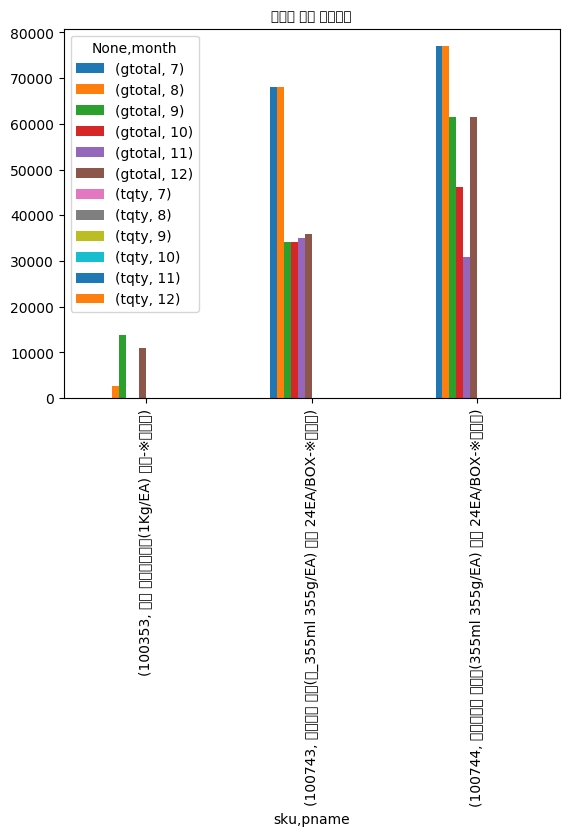

In [18]:
SQL_Result_DF1.set_index(['sku', 'pname', 'month'])[:15].unstack(level=-1).plot(kind='bar', stacked=False)
plt.rcParams["font.family"] = 'AppleMyungjo'
plt.rcParams['font.size'] = 8
plt.title(u'품목별 월별 매출현황' )
plt.show()

### Truncate unicode string with Unicode utf-8 

In [19]:
print tuple[1]
def unicode_truncate(s, length, encoding='utf-8'):
    encoded = s.encode(encoding)[:length]
    return encoded.decode(encoding, 'ignore')
print unicode_truncate(tuple[1], 60)

4400016


AttributeError: 'int' object has no attribute 'encode'

### tuple insertion

In [ ]:
 t1 = ( (1, 'p100', 'JUL', 20), (1, 'p100', 'AUG', 30),
        (2, 'p200', 'JUL', 10), (2, 'p200', 'AUG', 40), (2, 'p200', 'SEP', 50),
        (3, 'p300', 'JUL', 40),
        (4, 'p400', 'JUL', 10), (4, 'p400', 'AUG', 20), (4, 'p400', 'SEP', 40), (4, 'p400', 'OCT', 60)
      )

In [ ]:
t1

### DataFrame from dictionary

In [ ]:
from pandas import Series, DataFrame
import numpy as np


dict1 = {'JUL':[10,20,30,40],
         'AUG':[11,21,31,41],
         'SEP':[12,22,32,42],
         'OCT':[13,23,33,43]
        }
df1 = DataFrame(dict1, columns=['JUL', 'AUG', 'SEP', 'OCT'], index=['p1','p2', 'p3','p4'])
df1

### new row insertion with dict form into DataFrame 

In [ ]:
df1.loc['p4'] = {'JUL':14, 'AUG':24, 'SEP':34, 'OCT':44}
df1

In [ ]:
df1.loc['p5'] = [50, 51, 52, 53]
df1

###  Test Unstack

In [ ]:
df1.unstack(level=0)

In [ ]:
index = pd.MultiIndex.from_tuples([('one', 'a'), ('one', 'b'),
                                   ('two', 'a'), ('two', 'b')])
s1 = Series(np.arange(1.0, 5.0), index=index)


In [ ]:
s1

In [ ]:
s.unstack(level=-1)

###  DataFrame with unstackI()

In [ ]:
dfmi = DataFrame(dict1, columns=['JUL', 'AUG', 'SEP', 'OCT'], index=index)
dfmi

In [ ]:
dfmi.unstack(level=-1)

In [ ]:
dfmi.unstack(level=0)

In [ ]:
dfmi.unstack(level=0).plot(kind='bar', stacked=True)

In [ ]:
dfmi.unstack(level=-2)

### Condition check of tuples and Make a dict from tuple elements

In [ ]:
t1

In [ ]:
colarray = ['JUL', 'AUG', 'SEP', 'OCT']

prev = None
new_d = {'JUL':None, 'AUG':None, 'SEP':None, 'OCT':None}
dfdic = DataFrame(None, columns=colarray)
for t in t1:    
    if prev != t[0] and prev != None:
        print new_d
        dfdic.loc[t[1]] = new_d
        new_d = {'JUL':None, 'AUG':None, 'SEP':None, 'OCT':None}
        
    new_d[t[2]]= t[3]
    prev = t[0]
print new_d

In [ ]:
dfdic

In [ ]:
df1.loc['p100'] = [None, None, None, None]
df1.loc['p100']['JUL'] = 299

df1


### SQL result to DataFrame in SQLite3

In [ ]:
myFrame = pd.read_sql_query(sql_cmd, conn)

In [ ]:
myFrame

In [ ]:
myFrame_T = myFrame.set_index(['sku','pname','month'])

In [ ]:
myFrame_T

In [ ]:
myFrame_T.loc[u'백설 바삭튀김가루(1Kg/EA) 미국-※미국산']

In [ ]:
myFrame_T[myFrame_T['sku'] == '100353']